In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Import Data


In [46]:
fileName = 'loan_data.csv'
df = pd.read_csv(fileName)

df[df.notna().sum().sort_values().index].info()

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_5240\1849666050.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fileName)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    0 non-null       float64
 1   desc                         17 non-null      object 
 2   dti_joint                    34001 non-null   float64
 3   annual_inc_joint             34003 non-null   float64
 4   verification_status_joint    34003 non-null   object 
 5   mths_since_last_record       141179 non-null  float64
 6   mths_since_last_major_derog  215105 non-null  float64
 7   mths_since_last_delinq       396633 non-null  float64
 8   next_pymnt_d                 591423 non-null  object 
 9   il_util                      658743 non-null  float64
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  title                        736165 non-null  object 
 13 

In [47]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [49]:
selected_columns = [
    'annual_inc', 'dti', 'revol_util', 'emp_length', 'home_ownership',
    'purpose', 'loan_amnt', 'int_rate', 'installment', 'grade',
    'sub_grade', 'verification_status', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'total_acc', 'earliest_cr_line', 'addr_state',
    'term', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'collections_12_mths_ex_med', 'loan_status'
]

selected_df = df[selected_columns]
selected_df.head()

,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,installment,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status
0,10000.0,21.61,55.1,NaN,OWN,credit_card,2300,12.62,77.08,C,C1,Not Verified,0,1.0,4,0,6,Sep-1985,NY,36 months,382.99,270.09,112.90,0.0,0,Current
1,94000.0,25.61,105.8,10+ years,MORTGAGE,debt_consolidation,16000,12.62,360.95,C,C1,Not Verified,0,0.0,9,0,26,Jun-1992,MA,60 months,2060.09,1186.93,873.16,0.0,0,Current
2,46350.0,8.88,44.9,7 years,MORTGAGE,home_improvement,6025,15.05,209.01,C,C4,Not Verified,0,0.0,11,0,27,Jun-2002,MA,36 months,1032.46,684.18,348.28,0.0,0,Current
3,44000.0,27.06,18.7,10+ years,RENT,car,20400,9.44,652.91,B,B1,Source Verified,0,1.0,15,0,19,Jan-2007,CA,36 months,3237.80,2501.19,736.61,0.0,0,Current
4,85000.0,6.79,88.0,10+ years,MORTGAGE,debt_consolidation,13000,11.99,431.73,B,B5,Source Verified,1,0.0,5,0,24,Feb-2002,MN,36 months,2137.00,1539.34,597.66,0.0,0,Current


### Target Output - Loan Status

In [50]:
selected_df['loan_status'].value_counts()

loan_status
Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: count, dtype: int64

In [51]:
selected_df= selected_df[selected_df['loan_status'] != 'In Grace Period']                                                    # Remove loans in Grace Period
#df['loan_status'] = df['loan_status'].str.replace(pat='Late.*', regex=True, repl='Late')          # Late (15-30 days) ---> Late
selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off') 

selected_df['loan_status'].value_counts() 

loan_status
Current               565523
Fully Paid            130718
Charged Off            37233
Late (31-120 days)     15354
Late (16-30 days)       3876
Name: count, dtype: int64

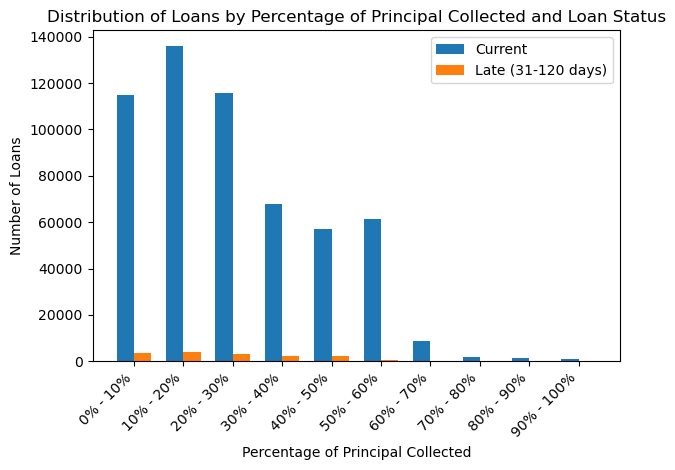

In [53]:
import matplotlib.pyplot as plt
import numpy as np


current_loans = selected_df[selected_df['loan_status'] == 'Current']
late_loans = selected_df[selected_df['loan_status'] == 'Late (31-120 days)']

# Combine both datasets into one DataFrame
combined_loans = pd.concat([current_loans, late_loans])

# Calculate the percentage of principal collected for each loan
combined_loans['principal_collected_percentage'] = (combined_loans['total_rec_prncp'] / combined_loans['loan_amnt']) * 100

# Define the percentage ranges
percentage_ranges = [(i, i+10) for i in range(0, 100, 10)]

# Initialize dictionaries to count the number of loans in each percentage range
current_loan_counts = {range_: 0 for range_ in percentage_ranges}
late_loan_counts = {range_: 0 for range_ in percentage_ranges}

# Count the number of loans in each percentage range for both loan statuses
for percentage, loan_status in zip(combined_loans['principal_collected_percentage'], combined_loans['loan_status']):
    for range_ in percentage_ranges:
        if range_[0] <= percentage < range_[1]:
            if loan_status == 'Current':
                current_loan_counts[range_] += 1
            elif loan_status == 'Late (31-120 days)':
                late_loan_counts[range_] += 1
            break  # Once the loan is counted in a range, move to the next loan

# Extract the range labels for plotting
labels = [f"{range_[0]}% - {range_[1]}%" for range_ in percentage_ranges]

# Extract the counts for plotting
current_counts = [current_loan_counts[range_] for range_ in percentage_ranges]
late_counts = [late_loan_counts[range_] for range_ in percentage_ranges]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, current_counts, width=bar_width, label='Current')
plt.bar(x + bar_width/2, late_counts, width=bar_width, label='Late (31-120 days)')
plt.xlabel('Percentage of Principal Collected')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Percentage of Principal Collected and Loan Status')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
# Calculate the percentage of principal collected for each loan
selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100

# Update the loan status based on the percentage of principal collected
selected_df.loc[(selected_df['loan_status'] == 'Current') & (selected_df['principal_collected_percentage'] > 60), 'loan_status'] = 'Fully Paid'
selected_df.loc[(selected_df['loan_status'] == 'Late (31-120 days)') & (selected_df['principal_collected_percentage'] < 30), 'loan_status'] = 'Charged Off'

selected_df['loan_status'].value_counts() 

loan_status
Current               552507
Fully Paid            143734
Charged Off            47781
Late (31-120 days)      4806
Late (16-30 days)       3876
Name: count, dtype: int64

In [55]:
df_modified = selected_df[~selected_df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)', 'Current'])]
df_modified['loan_status'].value_counts() 

loan_status
Fully Paid     143734
Charged Off     47781
Name: count, dtype: int64

### Remove empty columns and correlated columns

In [57]:
df_numerical_features = df_modified.select_dtypes(include=['number', 'int', 'float'])
df_numerical_features.head()

,annual_inc,dti,revol_util,loan_amnt,int_rate,installment,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,principal_collected_percentage
8,153000.0,16.99,22.7,11575,7.35,359.26,0,0.0,20,1,46,11707.816236,11575.0,132.82,0.0,0,100.0
10,50000.0,6.07,98.9,7200,24.85,285.70,0,0.0,4,0,5,7206.461000,7200.0,6.46,0.0,0,100.0
24,110000.0,13.12,27.2,7500,7.35,232.79,0,2.0,19,0,27,7642.289180,7500.0,142.29,0.0,0,100.0
42,51979.0,10.11,20.0,10000,16.02,243.29,0,0.0,15,2,21,10026.700000,10000.0,26.70,0.0,0,100.0
91,75000.0,10.86,90.0,14000,16.02,492.34,1,0.0,4,0,10,14375.136851,14000.0,375.14,0.0,0,100.0


#### Numerical features

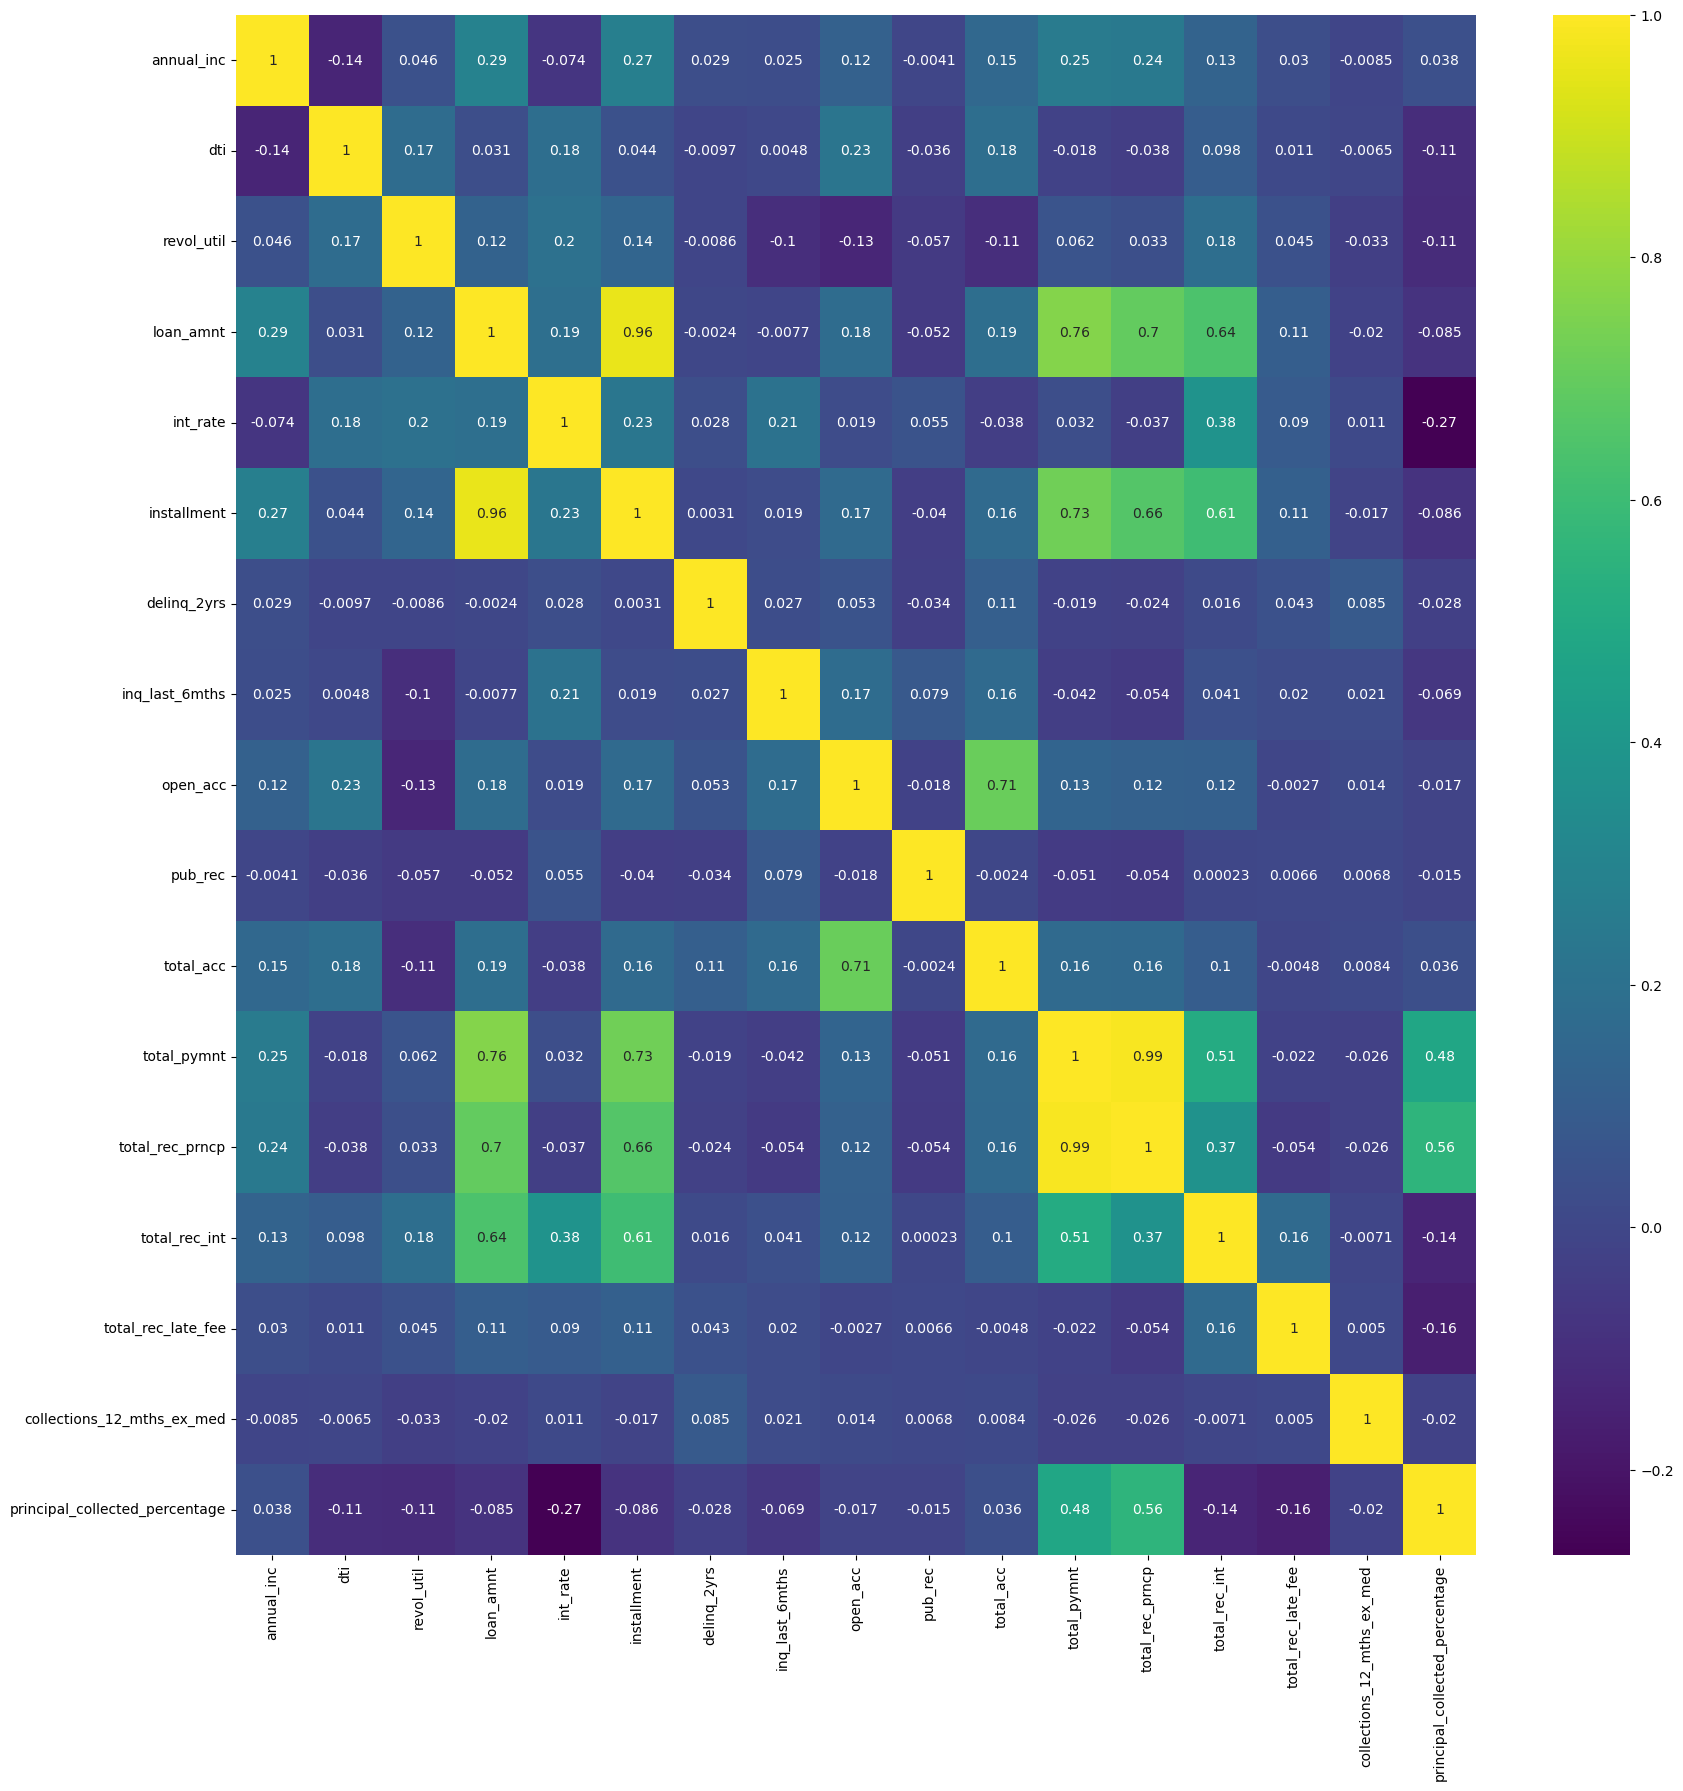

In [70]:
plt.figure(figsize=(20, 20));
sns.heatmap(df_numerical_features.corr(), annot=True, cmap='viridis');

In [87]:
df_modified.drop(columns=['total_rec_prncp', 
                           'installment']);

,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage
8,153000.0,16.99,22.7,6 years,OWN,credit_card,11575,7.35,A,A4,Not Verified,0,0.0,20,1,46,Jul-1994,CA,36 months,11707.816236,132.82,0.0,0,Fully Paid,100.000000
10,50000.0,6.07,98.9,2 years,RENT,debt_consolidation,7200,24.85,E,E3,Source Verified,0,0.0,4,0,5,Jan-2000,WA,36 months,7206.461000,6.46,0.0,0,Fully Paid,100.000000
24,110000.0,13.12,27.2,7 years,MORTGAGE,debt_consolidation,7500,7.35,A,A4,Not Verified,0,2.0,19,0,27,Mar-2013,TX,36 months,7642.289180,142.29,0.0,0,Fully Paid,100.000000
42,51979.0,10.11,20.0,7 years,RENT,debt_consolidation,10000,16.02,C,C5,Source Verified,0,0.0,15,2,21,Aug-2006,CA,60 months,10026.700000,26.70,0.0,0,Fully Paid,100.000000
91,75000.0,10.86,90.0,7 years,MORTGAGE,debt_consolidation,14000,16.02,C,C5,Verified,1,0.0,4,0,10,May-2008,MA,36 months,14375.136851,375.14,0.0,0,Fully Paid,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759330,65000.0,17.54,81.4,10+ years,RENT,debt_consolidation,24100,18.49,E,E2,Source Verified,0,0.0,7,0,16,Sep-1999,SC,60 months,11106.980000,6026.11,0.0,0,Charged Off,21.082448
759331,46800.0,19.18,32.6,5 years,MORTGAGE,credit_card,4000,9.17,B,B2,Source Verified,0,0.0,12,0,27,Jul-2002,MN,36 months,4486.110114,486.11,0.0,0,Fully Paid,100.000000
759332,33000.0,28.95,62.6,< 1 year,RENT,debt_consolidation,5000,9.17,B,B2,Not Verified,0,1.0,9,0,12,Sep-2005,CA,36 months,3663.650000,628.91,0.0,0,Fully Paid,60.694800
759333,38000.0,12.35,36.8,< 1 year,OWN,credit_card,6000,7.89,A,A5,Source Verified,0,0.0,10,0,14,Feb-2006,OH,36 months,4314.930000,646.34,0.0,0,Fully Paid,61.143167


In [88]:
df_modified.head()

,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,installment,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,earliest_cr_line,addr_state,term,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage
8,153000.0,16.99,22.7,6 years,OWN,credit_card,11575,7.35,359.26,A,A4,Not Verified,0,0.0,20,1,46,Jul-1994,CA,36 months,11707.816236,11575.0,132.82,0.0,0,Fully Paid,100.0
10,50000.0,6.07,98.9,2 years,RENT,debt_consolidation,7200,24.85,285.70,E,E3,Source Verified,0,0.0,4,0,5,Jan-2000,WA,36 months,7206.461000,7200.0,6.46,0.0,0,Fully Paid,100.0
24,110000.0,13.12,27.2,7 years,MORTGAGE,debt_consolidation,7500,7.35,232.79,A,A4,Not Verified,0,2.0,19,0,27,Mar-2013,TX,36 months,7642.289180,7500.0,142.29,0.0,0,Fully Paid,100.0
42,51979.0,10.11,20.0,7 years,RENT,debt_consolidation,10000,16.02,243.29,C,C5,Source Verified,0,0.0,15,2,21,Aug-2006,CA,60 months,10026.700000,10000.0,26.70,0.0,0,Fully Paid,100.0
91,75000.0,10.86,90.0,7 years,MORTGAGE,debt_consolidation,14000,16.02,492.34,C,C5,Verified,1,0.0,4,0,10,May-2008,MA,36 months,14375.136851,14000.0,375.14,0.0,0,Fully Paid,100.0


#### Handling Null values

In [89]:
null_columns = df_modified.columns[df_modified.isnull().any()]
df_modified[null_columns].describe(include='all')

,dti,revol_util,emp_length
count,191475.000000,191381.000000,179277
unique,NaN,NaN,11
top,NaN,NaN,10+ years
freq,NaN,NaN,65182
mean,18.566909,47.740032,NaN
std,11.188874,24.735198,NaN
min,-1.000000,0.000000,NaN
25%,11.900000,28.800000,NaN
50%,17.890000,47.000000,NaN
75%,24.600000,66.300000,NaN


In [90]:
######## dti
null_dti_df = df_modified[df_modified['dti'].isnull()]
null_dti_df['loan_status'].value_counts()

loan_status
Fully Paid     30
Charged Off    10
Name: count, dtype: int64

In [91]:
df_modified['dti'].fillna(df_modified['dti'].mean());    #Fill missing values with mean

In [93]:
########  inq_last_6mths
null_inq_last_6mths_df = df_modified[df_modified['inq_last_6mths'].isnull()]
null_inq_last_6mths_df['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

In [94]:
df_modified['inq_last_6mths'].fillna(0, inplace=True);    #fill missing value with 0

In [95]:
####### revol_util
null_revol_util_df = df_modified[df_modified['revol_util'].isnull()]
print(null_revol_util_df['loan_status'].value_counts())

df_modified['revol_util'].fillna(df_modified['revol_util'].mean());

loan_status
Fully Paid     102
Charged Off     32
Name: count, dtype: int64


emp_length
10+ years    65182
2 years      17570
3 years      15483
< 1 year     14739
1 year       13072
5 years      11808
4 years      11301
6 years       8160
8 years       7971
9 years       7602
7 years       6389
Name: count, dtype: int64
--------------------------------

loan_status
Fully Paid     8194
Charged Off    4044
Name: count, dtype: int64


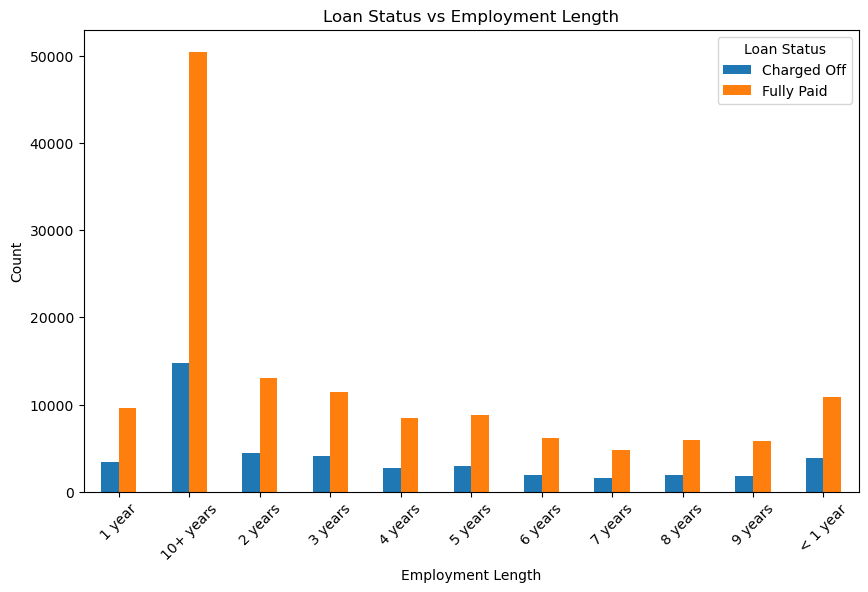

In [106]:
####### emp_length
print(df_modified['emp_length'].value_counts())
print('--------------------------------\n')

null_emp_length_df = df_modified[df_modified['emp_length'].isnull()]
print(null_emp_length_df['loan_status'].value_counts())

grouped = df_modified.groupby(['emp_length', 'loan_status']).size().unstack();
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Loan Status vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()